<img src='slides/8_36.png'><br>
<img src='slides/8_37.png'>

データの取得
- Rによる統計的学習入門, 朝倉書店, 2018.<br>
An Introduction to Statistical Learning with Applications in R, Springer, 2017.<br>
https://www.statlearning.com<br>
https://cran.r-project.org/web/packages/ISLR/index.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

In [2]:
hitters = pd.read_csv('data/Hitters.csv')
# 欠損値 NaN の個数
print("欠損値の個数：")
print(hitters.isna().sum())
# 欠損値 NaN を含む行の除去
hitters = hitters.dropna()
# 確認
hitters

欠損値の個数：
Name          0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


使用するデータ
- Hits: 年間ヒット数
- Years: 在籍年数
- Salary: 年俸

<AxesSubplot:xlabel='Salary', ylabel='Count'>

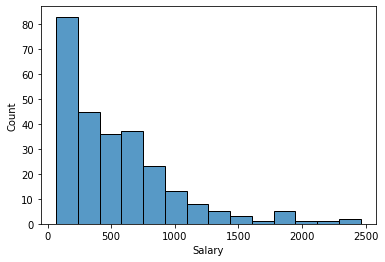

In [3]:
# 年俸のヒストグラム
sns.histplot(data=hitters.Salary)

<AxesSubplot:xlabel='Salary', ylabel='Count'>

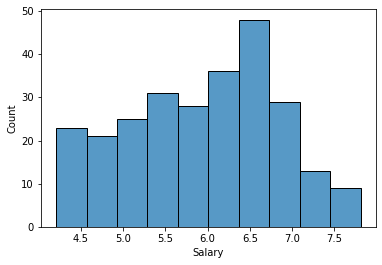

In [4]:
# 対数変換することで釣鐘の形に変換（正規分布に近似）
sns.histplot(data=np.log(hitters.Salary))

In [ ]:
# 'Years', 'Hits', 対数変換した Salary からなる DataFrame を作成
df = hitters[['Years', 'Hits']]
df = df.assign(Salary=np.log(hitters.Salary))
df

In [ ]:
# 説明変数、目的変数の作成
X = df.drop(['Salary'], axis=1)
Y = df.Salary

# 回帰木を作成、MSEを表示
# - max_depth: 最大深さ
# - min_samples_split: 分割の対象となる最小データ数
model = DecisionTreeRegressor(max_depth=2, min_samples_split=100)
model.fit(X, Y)
Y_predict = model.predict(X)
print('MSE={:.3f}'.format(mean_squared_error(Y, Y_predict)))

In [ ]:
# 作成した回帰木の描画
plt.figure(figsize=(12, 10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

In [ ]:
# 散布図上で領域に分割
sns.scatterplot(x=df.Years, y=df.Hits)
plt.plot([4.5, 4.5], [0, df.Hits.max()], color='orange')
plt.plot([4.5, 25], [117.5, 117.5], color='orange')

<img src='slides/8_38.png'>